# This notebook is to transform the raw rating data into standardized scores for each recording

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LinearRegression, LogisticRegression


In [2]:
ratings_df = pd.read_csv("C:\\Users\\baile\\OneDrive\\Desktop\\Classes\\Fall2020Classes\\Thesis\\Please_Dont_Sing\\current_ratings.csv")

### We will calculate the mean and the standard deviation of the ratings for each volunteer

In [3]:
ratings_standard_dev = ratings_df.groupby("name").std()
ratings_mean = ratings_df.groupby("name").mean()

In [4]:
ratings_standard_dev.head()

,rating
name,
Abigail Haworth,1.643168
Alicia Ver Voort,1.341641
Alvin Theckedath,2.073644
Anthony Martin,1.816590
Azniv Khaligian,2.375647


In [5]:
ratings_mean

,rating
name,
Abigail Haworth,6.200000
Alicia Ver Voort,6.400000
Alvin Theckedath,3.400000
Anthony Martin,5.400000
Azniv Khaligian,4.342857
Bailey Wellen,4.428571
Brenton J. Schimp,5.100000
Claire Bromley,6.300000
Dan Podawiltz,4.766667


### Next, we create: 
* a list that holds the difference of each rating from the mean of the rater
* a list that holds the z score of each rating (or the difference from the mean / standard deviation) 

In [6]:
ratings_differences = [(ratings_df.iloc[i, 2] - ratings_mean.loc[ratings_df.iloc[i, 0], 'rating']) for i in range(len(ratings_df))]
ratings_normalized = [(ratings_differences[i] / ratings_standard_dev.loc[ratings_df.iloc[i, 0], 'rating']) for i in range(len(ratings_df))]

In [7]:
ratings_normalized

[0.1094140829227507,
 -1.0628796626781505,
 -0.4767327898776999,
 -0.4767327898776999,
 1.2817078285236518,
 -1.5825131361498892,
 0.395628284037472,
 -0.26375218935831507,
 1.055008757433259,
 0.395628284037472,
 -0.9760066581554423,
 0.5384864320857611,
 0.033655402005359956,
 -0.4711756280750412,
 -1.4808376882358434,
 1.5481484922465634,
 2.0529795223269645,
 -0.4711756280750412,
 -0.9760066581554423,
 1.0433174621661623,
 -0.8323163659625112,
 1.7960511054980501,
 0.04380612452434253,
 0.04380612452434253,
 0.4818673697677694,
 -1.708438856449365,
 0.4818673697677694,
 -0.8323163659625112,
 -0.39425512071908436,
 0.9199286150111963,
 0.033655402005359956,
 -0.4711756280750412,
 0.033655402005359956,
 -0.9760066581554423,
 0.5384864320857611,
 1.0458607465600853,
 0.43064854270121167,
 0.43064854270121167,
 -2.030200272734283,
 -1.4149880688754093,
 -0.18456366115766198,
 -2.030200272734283,
 0.43064854270121167,
 -0.18456366115766198,
 -0.18456366115766198,
 -0.18456366115766198,


Text(0, 0.5, 'Z Score')

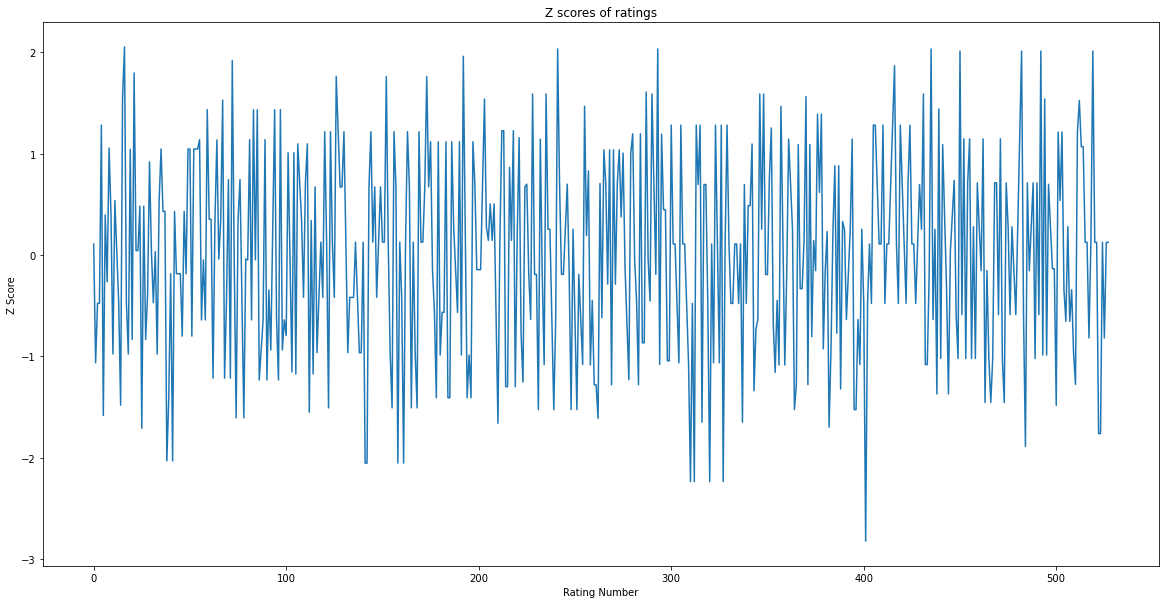

In [8]:
plt.figure(figsize = (20,10))
plt.plot(ratings_normalized)
plt.title("Z scores of ratings")
plt.xlabel("Rating Number")
plt.ylabel("Z Score")

Text(0, 0.5, 'frequency')

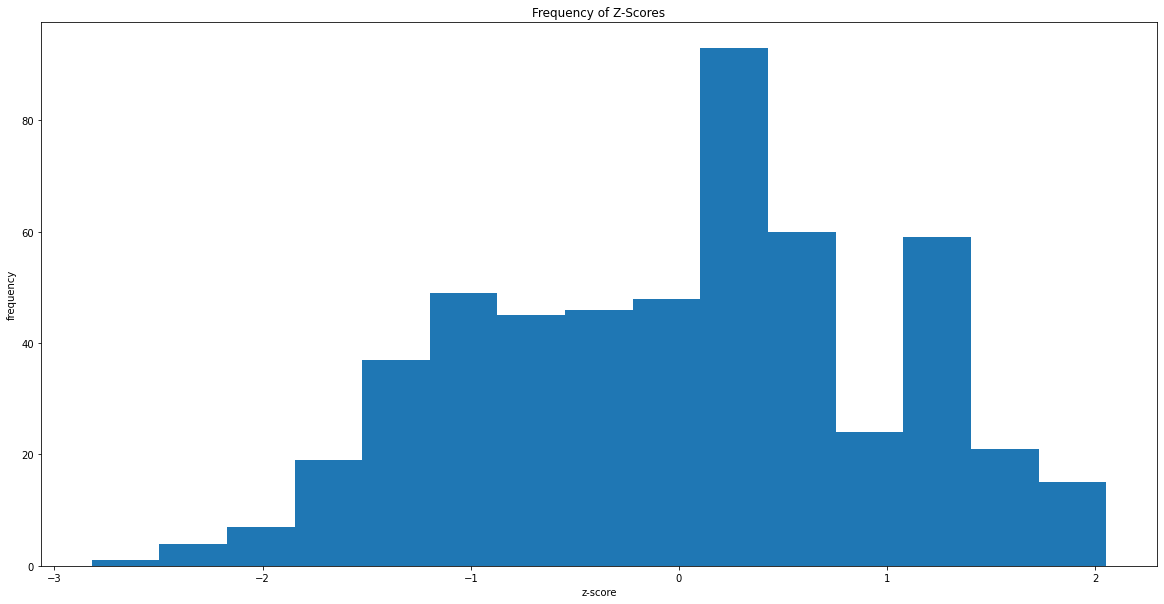

In [9]:
plt.figure(figsize = (20,10))
plt.hist(ratings_normalized, bins = 'auto')
plt.title("Frequency of Z-Scores")
plt.xlabel("z-score")
plt.ylabel("frequency")


We can see visually that these z scores are all centered around 0, which is a good sign!

In [10]:
#add the z scores to the original dataframe
ratings_df['z_score'] = ratings_normalized

In [11]:
#finally, take the average of the z scores of each recording to get a final value for those recordings
ratings_zscores = ratings_df.groupby('rating_id').mean()

In [12]:
ratings_zscores.head()

,rating,z_score
rating_id,,
recording0.mp3,9.50,1.510151
recording1.mp3,9.25,1.182873
recording10.mp3,4.25,-0.965464
recording11.mp3,7.50,0.707929
recording12.mp3,6.75,0.811068


If we decide that we want to use ML to predict a categorical variable instead of a continuous (like we have with z scores), we can use the pd.cut() function.  

When we run that below, we see that it segments the three categories to be (-1.689 to -0.58), (-0.58 to 0.524), and (0.524 to 1.629). This seems reasonable - the first group would be recordings that had consistently bad reviews. The second is "average" recordings, and the third group has recordings that had better than average reviews.  

If we go this route, we know that all three groups will have the same amount of reviews in them. 

In [13]:
def assign_category(df):
    if df['z_score'] <= -0.61:
        ret_val = "bad"
    elif df['z_score'] <= 0.51:
        ret_val = "okay"
    else:
        ret_val = "good"

    return ret_val


ratings_zscores['category'] = ratings_zscores.apply(assign_category, axis = 1)

We will also make a column for a binary category

In [14]:
pd.cut(ratings_zscores['z_score'], 3)

rating_id
recording0.mp3        (0.51, 1.63]
recording1.mp3        (0.51, 1.63]
recording10.mp3    (-1.734, -0.61]
recording11.mp3       (0.51, 1.63]
recording12.mp3       (0.51, 1.63]
                        ...       
recording84.mp3       (0.51, 1.63]
recording85.mp3    (-1.734, -0.61]
recording86.mp3      (-0.61, 0.51]
recording87.mp3    (-1.734, -0.61]
recording9.mp3     (-1.734, -0.61]
Name: z_score, Length: 88, dtype: category
Categories (3, interval[float64]): [(-1.734, -0.61] < (-0.61, 0.51] < (0.51, 1.63]]

In [15]:
def assign_category(df):
    if df['z_score'] <= -0.0801:
        ret_val = "bad"
    else:
        ret_val = "good"

    return ret_val


ratings_zscores['binary_category'] = ratings_zscores.apply(assign_category, axis = 1)

In [16]:
ratings_zscores[ratings_zscores['binary_category'] == 'bad']

,rating,z_score,category,binary_category
rating_id,,,,
recording10.mp3,4.250000,-0.965464,bad,bad
recording13.mp3,3.714286,-0.508544,okay,bad
recording14.mp3,3.750000,-0.441304,okay,bad
recording16.mp3,4.750000,-0.653356,bad,bad
recording17.mp3,3.600000,-0.949100,bad,bad
recording18.mp3,4.333333,-0.506716,okay,bad
recording19.mp3,4.000000,-0.401552,okay,bad
recording2.mp3,4.000000,-1.129216,bad,bad
recording22.mp3,5.250000,-0.127657,okay,bad


In [18]:
#below, I am just finding the recordings that haven't been selected often by the randomizer - I am going to change the randomizer to only choose from these for a day or two

rating_counts = ratings_df.groupby('rating_id').count()
rating_counts[rating_counts['name'] < 3].index

Index([], dtype='object', name='rating_id')

## Everything below here is working on building the model

### First, we will build a very simple starting model to see if summary data about the recordings can predict the rating

In [19]:
audio_features = pd.read_csv("C:\\Users\\baile\\OneDrive\\Desktop\\Classes\\Fall2020Classes\\Thesis\\Please_Dont_Sing\\simplified_audio_freq.csv")

In [20]:
audio_features['id'] = [("recording" +  str(num) + ".mp3") for num in audio_features['id']]

In [21]:
audio_features

,id,average,std_dev,len
0,recording1.mp3,311.189124,194.508545,2109
1,recording2.mp3,291.648606,192.619965,2020
2,recording3.mp3,350.284240,359.701965,2064
3,recording4.mp3,243.972904,61.469997,212
4,recording5.mp3,458.339860,778.407043,1141
...,...,...,...,...
82,recording83.mp3,579.558508,746.467896,1312
83,recording84.mp3,200.859403,350.943451,1520
84,recording85.mp3,1903.087095,11079.083980,994
85,recording86.mp3,509.291668,1414.707397,947


In [22]:
full_dataset = audio_features.merge(ratings_zscores, left_on = 'id', right_on = 'rating_id')

In [23]:
full_dataset

,id,average,std_dev,len,rating,z_score,category,binary_category
0,recording1.mp3,311.189124,194.508545,2109,9.25,1.182873,good,good
1,recording2.mp3,291.648606,192.619965,2020,4.00,-1.129216,bad,bad
2,recording3.mp3,350.284240,359.701965,2064,9.00,1.450749,good,good
3,recording4.mp3,243.972904,61.469997,212,6.75,0.795809,good,good
4,recording5.mp3,458.339860,778.407043,1141,3.50,-0.698715,bad,bad
...,...,...,...,...,...,...,...,...
82,recording83.mp3,579.558508,746.467896,1312,8.00,1.086943,good,good
83,recording84.mp3,200.859403,350.943451,1520,8.50,1.260367,good,good
84,recording85.mp3,1903.087095,11079.083980,994,3.80,-0.791304,bad,bad
85,recording86.mp3,509.291668,1414.707397,947,7.00,0.494580,okay,good


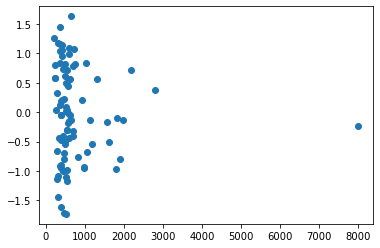

In [24]:
plt.scatter(full_dataset['average'], full_dataset['z_score'])

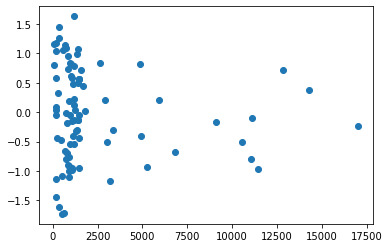

In [25]:
plt.scatter(full_dataset['std_dev'], full_dataset['z_score'])


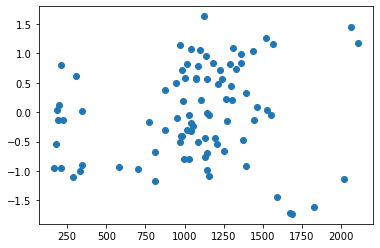

In [26]:
plt.scatter(full_dataset['len'], full_dataset['z_score'])

Let's look at the correlation coefficients of the different values - if we are going to do linear regression, we should have a linear relationship here

In [27]:
full_dataset.corr()['z_score']

average   -0.053845
std_dev   -0.085217
len        0.155751
rating     0.961648
z_score    1.000000
Name: z_score, dtype: float64

This doesn't look like it's a linear relationship... we are going to have to try something else

In [28]:
X = full_dataset[['average', 'std_dev', 'len']]
Y = full_dataset[['z_score', 'binary_category']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
Y_test.reset_index(inplace = True)

In [29]:
neigh = KNeighborsRegressor(n_neighbors = 3)
neigh.fit(X_train, Y_train[['z_score']])

KNeighborsRegressor(n_neighbors=3)

In [30]:
Y_pred = neigh.predict(X_test)

In [31]:
Y_pred

array([[-0.54307235],
       [-0.37152348],
       [-0.09984222],
       [ 0.29870183],
       [-0.41288753],
       [-0.17037809],
       [ 0.03265749],
       [ 0.03536757],
       [-0.63039252],
       [-0.13421744],
       [ 0.65391587],
       [-0.27295748],
       [-0.15191122],
       [-0.17037809],
       [ 0.10280109],
       [ 0.72015473],
       [-0.48994251],
       [ 0.0215266 ],
       [-0.00960492],
       [-0.85303343],
       [-0.65546618],
       [-0.12020135]])

In [32]:
def assign_category(val):
    if val <= -0.0801:
        ret_val = "bad"
    else:
        ret_val = "good"

    return ret_val

Y_pred_classes = [assign_category(prediction) for prediction in Y_pred]

In [33]:
Y_actual_classes = Y_test['binary_category']

In [34]:
confusion_matrix(Y_actual_classes, Y_pred_classes)

array([[9, 4],
       [5, 4]], dtype=int64)

In [35]:
accuracy_score(Y_actual_classes, Y_pred_classes)

0.5909090909090909

With Nearest Neighbor Regression (n = 3 neighbors), and input features of average frequency, standard deviation, and length of the recording, we get an accuracy of 45 %.... that is better than random, at least!!)



In [36]:
Y_pred_classes

['bad',
 'bad',
 'bad',
 'good',
 'bad',
 'bad',
 'good',
 'good',
 'bad',
 'bad',
 'good',
 'bad',
 'bad',
 'bad',
 'good',
 'good',
 'bad',
 'good',
 'good',
 'bad',
 'bad',
 'bad']

In [37]:
Y_pred

array([[-0.54307235],
       [-0.37152348],
       [-0.09984222],
       [ 0.29870183],
       [-0.41288753],
       [-0.17037809],
       [ 0.03265749],
       [ 0.03536757],
       [-0.63039252],
       [-0.13421744],
       [ 0.65391587],
       [-0.27295748],
       [-0.15191122],
       [-0.17037809],
       [ 0.10280109],
       [ 0.72015473],
       [-0.48994251],
       [ 0.0215266 ],
       [-0.00960492],
       [-0.85303343],
       [-0.65546618],
       [-0.12020135]])

However, if we look closer..... it predicts "okay" every time. That is not great

### What if we try logistic regression?


In [38]:
logist = LogisticRegression()
X = full_dataset[['average', 'std_dev', 'len']]
Y = full_dataset[["category"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [39]:
logist.fit(X_train, Y_train['category'])

LogisticRegression()

In [40]:
y_pred_log = logist.predict(X_test)

In [41]:
accuracy_score(Y_test, y_pred_log)

0.36363636363636365

In [42]:
confusion_matrix(Y_test, y_pred_log)

array([[0, 1, 7],
       [0, 2, 6],
       [0, 0, 6]], dtype=int64)

In [43]:
logist_probs = logist.predict_proba(X_test)

In [44]:
for recording in logist_probs:
    if recording[0] < 0.33: 
        print("Low probability")
    elif recording[0] > 0.66:
        print("High probability")
    else:
        print("Medium probability")

Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability
Low probability


In [45]:
y_pred_log

array(['okay', 'okay', 'okay', 'okay', 'okay', 'okay', 'okay', 'okay',
       'okay', 'okay', 'okay', 'good', 'okay', 'okay', 'okay', 'good',
       'okay', 'okay', 'good', 'okay', 'okay', 'okay'], dtype=object)

In [46]:
Y_test

,category
29,good
81,bad
84,bad
86,bad
30,good
77,bad
85,okay
19,okay
36,bad
53,okay


As of right now, it is looking like Logistic Regression is the best fit

### Now we will look at the data with all of the frequencies

In [47]:
all_audio_freqs = pd.read_csv("C:\\Users\\baile\\OneDrive\\Desktop\\Classes\\Fall2020Classes\\Thesis\\Please_Dont_Sing\\complete_audio_freqs.csv")

#add the id 
all_audio_freqs['id'] = [("recording" +  str(row) + ".mp3") for row in all_audio_freqs.index]

In [48]:
all_frequencies = all_audio_freqs.merge(ratings_zscores, left_on = 'id', right_on = 'rating_id')

In [49]:
all_frequencies

,frequency0,frequency1,frequency2,frequency3,frequency4,frequency5,frequency6,frequency7,frequency8,frequency9,...,frequency995,frequency996,frequency997,frequency998,frequency999,id,rating,z_score,category,binary_category
0,89.24,0.00,0.00,91.44,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,recording0.mp3,9.50,1.510151,good,good
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.30,...,98.25,0.00,206.11,602.63,351.84,recording1.mp3,9.25,1.182873,good,good
2,167.31,0.00,0.00,114.83,723.74,752.24,749.21,689.08,654.37,826.12,...,1211.16,291.10,298.85,145.92,129.52,recording2.mp3,4.00,-1.129216,bad,bad
3,86.30,144.79,0.00,0.00,86.30,0.00,0.00,0.00,95.89,107.60,...,189.87,199.27,98.12,0.00,99.59,recording3.mp3,9.00,1.450749,good,good
4,16000.00,206.78,200.73,0.00,0.00,205.26,203.67,206.61,187.21,187.21,...,254.05,254.05,254.05,254.05,212.37,recording4.mp3,6.75,0.795809,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,292.44,292.33,292.39,292.33,292.31,292.33,292.41,292.24,292.42,292.42,...,780.14,781.09,785.76,785.31,789.70,recording83.mp3,8.00,1.086943,good,good
84,114.14,120.07,100.85,132.04,98.90,119.89,126.86,131.46,125.77,130.55,...,178.10,147.90,147.03,148.60,149.97,recording84.mp3,8.50,1.260367,good,good
85,88199.94,150.32,151.91,170.89,167.73,2435.31,784.56,88200.00,118.76,120.31,...,0.00,0.00,88200.00,0.00,88200.00,recording85.mp3,3.80,-0.791304,bad,bad
86,961.14,263.11,288.59,901.07,880.26,933.72,913.26,933.85,910.05,875.93,...,286.52,285.00,287.13,292.41,294.64,recording86.mp3,7.00,0.494580,okay,good


In [50]:
full_logist = LogisticRegression(max_iter = 1000)

X = all_frequencies.drop(['z_score', 'category', 'binary_category', 'rating', 'id'], axis = 1)
Y = all_frequencies[['category']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
Y_test.reset_index(inplace = True)

In [51]:
X_train

,frequency0,frequency1,frequency2,frequency3,frequency4,frequency5,frequency6,frequency7,frequency8,frequency9,...,frequency990,frequency991,frequency992,frequency993,frequency994,frequency995,frequency996,frequency997,frequency998,frequency999
14,2537.19,109.58,117.80,160.46,147.28,94.71,130.42,96.37,172.32,93.93,...,104.08,111.49,120.04,106.74,160.45,103.50,168.01,93.93,103.62,267.38
12,161.13,187.29,188.35,144.84,86.63,132.22,135.98,202.35,88.08,102.44,...,155.74,148.08,86.69,194.06,145.50,87.34,141.63,100.74,158.78,163.23
83,292.44,292.33,292.39,292.33,292.31,292.33,292.41,292.24,292.42,292.42,...,781.35,782.15,780.69,780.24,783.77,780.14,781.09,785.76,785.31,789.70
13,88200.00,191.44,86.75,87.03,89.39,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.30
3,86.30,144.79,0.00,0.00,86.30,0.00,0.00,0.00,95.89,107.60,...,195.95,196.37,195.13,0.00,130.46,189.87,199.27,98.12,0.00,99.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,16000.00,135.89,229.71,764.56,184.31,709.35,1912.99,827.79,176.68,420.67,...,248.31,248.31,248.31,248.31,248.31,248.31,248.70,353.10,139.67,148.24
33,202.96,199.40,196.17,194.75,188.57,189.28,188.41,188.15,189.49,190.25,...,251.39,252.25,254.35,257.68,260.81,265.28,266.17,261.64,259.13,263.49
45,2014.41,0.00,1999.43,1939.62,242.99,221.98,217.45,281.62,871.18,876.73,...,230.33,453.04,473.17,473.99,466.46,238.58,241.96,238.96,237.86,258.93
23,131.13,141.51,1033.29,1026.63,1019.59,1042.83,1024.96,1015.97,944.92,198.05,...,116.19,135.24,93.93,93.93,118.24,93.93,119.32,108.00,93.93,149.09


In [52]:
full_logist.fit(X_train,Y_train)

C:\Users\baile\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

In [53]:
full_Y_pred = full_logist.predict(X_test)

In [54]:
confusion_matrix(Y_test['category'], full_Y_pred)

array([[1, 2, 3],
       [0, 2, 5],
       [0, 7, 2]], dtype=int64)

In [55]:
accuracy_score(Y_test['category'], full_Y_pred)

0.22727272727272727

In [56]:
full_Y_pred

array(['good', 'good', 'okay', 'good', 'okay', 'good', 'okay', 'okay',
       'good', 'good', 'okay', 'bad', 'okay', 'okay', 'okay', 'okay',
       'good', 'good', 'good', 'okay', 'good', 'good'], dtype=object)

In [57]:
probabilities = full_logist.predict_proba(X_test)

In [58]:
probabilities

array([[1.50169875e-010, 1.00000000e+000, 5.14491716e-014],
       [1.08390985e-005, 9.99247418e-001, 7.41743278e-004],
       [9.49209019e-026, 5.17559971e-010, 9.99999999e-001],
       [0.00000000e+000, 1.00000000e+000, 2.28301079e-207],
       [7.61210149e-012, 1.86406419e-006, 9.99998136e-001],
       [6.05900601e-029, 1.00000000e+000, 3.52500345e-020],
       [1.69839138e-012, 1.48662975e-012, 1.00000000e+000],
       [6.21257423e-002, 6.36478134e-004, 9.37237780e-001],
       [5.31248058e-005, 9.94853205e-001, 5.09367012e-003],
       [6.02300537e-068, 1.00000000e+000, 8.40878721e-082],
       [1.50646444e-002, 9.34242660e-004, 9.84001113e-001],
       [1.00000000e+000, 2.24044725e-050, 2.10082924e-050],
       [3.60651568e-016, 3.56420406e-014, 1.00000000e+000],
       [3.62710120e-001, 6.11845715e-011, 6.37289880e-001],
       [3.67569683e-009, 2.00556643e-011, 9.99999996e-001],
       [1.23977028e-005, 3.97003682e-001, 6.02983921e-001],
       [1.29943056e-005, 9.99971853e-001

In [59]:
#it looks like this model is VERY decisive... and maybe it shouldn't be!

### There are about 25 notes in Happy birthday.... let's group those frequencies into groups of 40 (1000 / 25) and see if that correlates more

In [60]:
grouped_frequencies = all_frequencies.drop(['rating', 'z_score', 'category', 'binary_category'], axis = 1)

In [61]:
num_per_section = int(len(grouped_frequencies.columns) / 25)

for chunk in range(25):
    grouped_frequencies['average{}'.format(chunk)] = grouped_frequencies.iloc[:, (chunk * num_per_section): (chunk * num_per_section) + num_per_section].mean(axis = 1)

In [62]:
grouped_frequencies = grouped_frequencies.iloc[ : , -26:]

In [63]:
grouped_frequencies = grouped_frequencies.merge(ratings_zscores, left_on = 'id', right_on = 'rating_id')
grouped_frequencies.head()

,id,average0,average1,average2,average3,average4,average5,average6,average7,average8,...,average19,average20,average21,average22,average23,average24,rating,z_score,category,binary_category
0,recording0.mp3,4.51700,201.58325,328.4610,290.01050,256.30775,198.84725,132.91650,331.77825,306.86375,...,788.60625,789.76575,695.67125,670.90225,38.64775,0.00000,9.50,1.510151,good,good
1,recording1.mp3,10.97850,164.35575,331.9245,299.94850,184.87000,74.60825,300.43900,342.71000,329.65750,...,268.75750,317.26050,331.59425,344.70750,350.21000,273.61850,9.25,1.182873,good,good
2,recording2.mp3,189.94700,64.33100,118.8675,211.52300,268.84500,368.01650,248.77800,266.02175,373.45225,...,217.16600,431.84600,690.19375,340.30125,300.25075,496.50350,4.00,-1.129216,bad,bad
3,recording3.mp3,51.60100,391.11375,304.0340,412.57700,292.18600,280.07100,253.12725,329.71950,412.47425,...,490.39850,465.59625,424.42350,412.34650,407.08800,253.53775,9.00,1.450749,good,good
4,recording4.mp3,581.83625,207.57275,200.7825,257.41175,254.29925,244.71550,235.47950,210.14875,276.74175,...,287.20000,260.60225,291.02250,275.71300,257.83900,254.10675,6.75,0.795809,good,good


### Now let's build another model on this

In [64]:
logist_grouped = LogisticRegression(max_iter = 10000)

X = grouped_frequencies.drop(['z_score', 'category', 'binary_category', 'rating', 'id'], axis = 1)
Y = grouped_frequencies[['binary_category', 'category']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
Y_test.reset_index(inplace = True)

In [65]:
X_train

,average0,average1,average2,average3,average4,average5,average6,average7,average8,average9,...,average15,average16,average17,average18,average19,average20,average21,average22,average23,average24
37,580.85800,525.06000,458.30975,946.06450,394.89400,115.55975,522.70600,584.55900,358.92025,835.07375,...,442.44425,454.17025,487.32625,548.64675,371.64525,368.51025,384.91550,1020.42050,422.74900,376.23550
66,296.66425,325.83325,332.14500,404.23825,535.99575,303.42075,319.35500,376.56850,416.29700,530.83975,...,349.17025,330.99075,426.35225,502.24650,528.12375,450.79725,566.74950,429.55275,570.59325,354.74200
78,326.97600,2591.66250,505.84175,315.91250,390.51850,3170.17975,328.30725,430.66700,2534.80800,2648.45000,...,2588.62075,369.19625,5041.72625,2588.57050,385.86550,398.39475,902.46525,1158.08675,9042.16075,13445.46150
34,179.03150,342.25575,417.89325,367.62675,398.32850,505.22950,337.07550,276.83300,936.41050,315.88375,...,1352.94325,256.59275,247.54850,392.62500,450.53050,359.23400,303.14400,324.83675,289.91325,287.71975
14,200.75500,447.65850,493.37825,466.36225,2433.26600,309.30150,291.59700,227.86500,472.70475,774.16625,...,1829.59200,443.75675,502.55075,404.15650,490.05775,2087.42100,658.28475,1859.67275,379.94875,245.79325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,198.94975,641.88325,396.21450,279.68550,244.91450,245.14550,336.77900,453.39825,348.26650,324.91450,...,261.13425,249.17225,366.29650,347.58775,332.29500,315.99375,285.47700,286.20525,258.69475,258.05625
41,583.51375,609.71450,468.99350,379.16275,667.36300,363.86400,642.66825,564.12100,434.62725,392.63000,...,528.26750,656.07275,564.52000,615.60075,469.08400,405.60975,443.15625,438.34550,432.25550,391.33400
51,754.63150,378.59375,316.80000,298.99800,268.62425,242.27100,721.02700,321.93200,304.66500,294.49600,...,272.63800,319.10225,342.55275,336.51525,261.64375,279.03600,272.93400,251.47600,246.43400,245.45000
69,785.43600,404.75400,545.18525,1144.25575,211.22100,97.53525,457.78475,1303.34250,1121.41400,1019.31800,...,264.56350,566.55275,541.89725,0.00000,614.03050,536.89275,1486.56975,1621.88125,223.24050,268.47675


In [66]:
logist_grouped.fit(X_train, Y_train['binary_category'])

LogisticRegression(max_iter=10000)

In [67]:
grouped_pred = logist_grouped.predict(X_test)

In [68]:
Y_test

,index,binary_category,category
0,10,bad,bad
1,59,bad,okay
2,75,bad,okay
3,33,good,okay
4,35,good,good
5,45,good,okay
6,3,good,good
7,79,bad,bad
8,82,bad,bad
9,83,good,good


In [69]:
confusion_matrix(Y_test['binary_category'], grouped_pred)

array([[4, 6],
       [4, 8]], dtype=int64)

In [70]:
accuracy_score(Y_test['binary_category'], grouped_pred)

0.5454545454545454

In [71]:
grouped_pred

array(['good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'bad',
       'bad', 'good', 'good', 'bad', 'good'], dtype=object)

In [72]:
probabilities =logist_grouped.predict_proba(X_test)

In [73]:
for recording in probabilities:
    if recording[0] > 0.66:
        print("definitely bad")
    elif recording[0] < 0.33:
        print("definitely good")
    else:
        print("we are not quite sure")

definitely good
definitely good
definitely bad
definitely good
definitely bad
definitely good
we are not quite sure
definitely good
definitely bad
definitely good
definitely good
definitely good
definitely good
definitely bad
definitely bad
definitely good
definitely bad
definitely bad
definitely good
definitely good
definitely bad
definitely good


In [74]:
Y_test['category']

0      bad
1     okay
2     okay
3     okay
4     good
5     okay
6     good
7      bad
8      bad
9     good
10     bad
11     bad
12    good
13    okay
14    good
15    okay
16     bad
17    okay
18    okay
19    okay
20    good
21    good
Name: category, dtype: object

### Hmmm... these don't seem to be so accurate so far. Let's output the data we have cleaned and go to another jupyter notebook to try a neural network instead of regression

In [77]:
grouped_frequencies.to_csv("C:\\Users\\baile\\OneDrive\\Desktop\\Classes\\Fall2020Classes\\Thesis\\Please_Dont_Sing\\grouped_frequencies.csv")
